In [9]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image_dataset_from_directory, image
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [10]:
train_path = r'../input/100-bird-species/train'
valid_path = r'../input/100-bird-species/valid'

train_dataset = image_dataset_from_directory(train_path,
                                            seed = 2059,
                                            image_size = (224, 224),
                                            batch_size = 256)


valid_dataset = image_dataset_from_directory(valid_path,
                                            seed = 2059,
                                            image_size = (224, 224),
                                            batch_size = 256)

Found 45980 files belonging to 315 classes.
Found 1575 files belonging to 315 classes.


In [11]:
labels = train_dataset.class_names
print(len(labels))

315


In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(96, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dense(len(labels), activation = 'softmax'))

In [13]:
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *

model.compile(optimizer = Adam(learning_rate = 0.0001),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 64)       

In [15]:
callbacks = EarlyStopping(
            
            min_delta = 0.01,
            patience = 10,
            restore_best_weights = True)

In [16]:
history = model.fit(x = train_dataset,
                   epochs = 20,
                   callbacks = [callbacks],
                   validation_data = valid_dataset)

Epoch 1/20
180/180 [==============================] - 122s 657ms/step - loss: 5.7549 - accuracy: 0.0109 - val_loss: 5.5120 - val_accuracy: 0.0305
Epoch 2/20
180/180 [==============================] - 64s 345ms/step - loss: 5.2803 - accuracy: 0.0393 - val_loss: 4.9774 - val_accuracy: 0.0686
Epoch 3/20
180/180 [==============================] - 64s 342ms/step - loss: 4.8098 - accuracy: 0.0791 - val_loss: 4.4775 - val_accuracy: 0.1200
Epoch 4/20
180/180 [==============================] - 64s 344ms/step - loss: 4.3682 - accuracy: 0.1246 - val_loss: 4.0482 - val_accuracy: 0.1778
Epoch 5/20
180/180 [==============================] - 65s 348ms/step - loss: 3.9816 - accuracy: 0.1777 - val_loss: 3.6634 - val_accuracy: 0.2241
Epoch 6/20
180/180 [==============================] - 64s 342ms/step - loss: 3.6593 - accuracy: 0.2259 - val_loss: 3.3559 - val_accuracy: 0.2787
Epoch 7/20
180/180 [==============================] - 63s 341ms/step - loss: 3.3766 - accuracy: 0.2710 - val_loss: 3.1000 - val_a

In [17]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,5.754893,0.010896,5.512018,0.030476
1,5.280252,0.039278,4.977378,0.068571
2,4.809779,0.079121,4.477531,0.120000
3,4.368216,0.124576,4.048214,0.177778
4,3.981614,0.177686,3.663376,0.224127


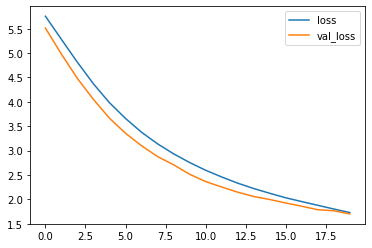

In [18]:
plt.plot(history_df.loc[ : , 'loss'], label = 'loss')
plt.plot(history_df.loc[ : , 'val_loss'], label = 'val_loss')
plt.legend()

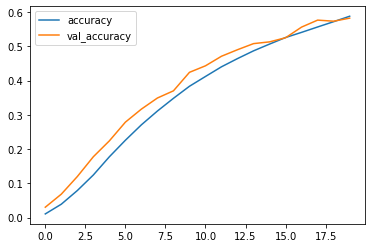

In [19]:
plt.plot(history_df.loc[ : , 'accuracy'], label = 'accuracy')
plt.plot(history_df.loc[ : , 'val_accuracy'], label = 'val_accuracy')
plt.legend()

Actual: BARRED PUFFBIRD
Predicted: BARRED PUFFBIRD


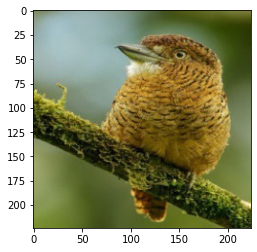

In [24]:
image_path = r'../input/100-bird-species/test/BARRED PUFFBIRD/4.jpg'

img = image.load_img(image_path, target_size = (224, 224, 3))
plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

images = np.vstack([x])

pred = model.predict(images, batch_size = 32)
label = np.argmax(pred, axis = 1)

print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+labels[np.argmax(pred)])